# Business Problem

This project is made for Echo Park Automotive. They are a used car dealership. I have made a Decision Tree Regressor model. This model will process the data of used cars, their features, and their price. Aftrer learning the relationships between the details or features of the car and its selling price, it can begin to analize a car and predict its price. This has been created so that Echo Park Automotive can decide which cars to buy. If the model predicts a higher selling price than what is proposed on a prospective car, they should buy it and can flip the car. If the model predicts a lower selling price then what is proposed, then they should not buy the car.

Meet the team: I am Samuel Robins the Data Scientist that has created this model.

# Data Understanding

Our Data was sourced from Kaggle (https://www.kaggle.com/datasets/rakkesharv/used-cars-detailed-dataset). It created by webscraping several used car sales websites. There are 973 entries with about 20 different features of each car. The target is the sales price and we are using the other features to predict the sales price. These features include :

Car_Name: The full name of the car which is displayed in the ad
Make: Maker of the Car
Model : Model of the Car
Make Year: Year of Manufacturing
Color : Color of the Car
Body Type : Body type of the car
Mileage Run: Total KMs the car run
No of Owners: Number of Previous Owners
Seating Capacity: Total Seating Capacity Available
Fuel Type: Fuel Type used by the car
Fuel Tank Capacity(L) : Total Fuel Capacity of the car
Engine Type : Engine Name, Model and Type
CC Displacement: Total Cubic Displacement
Transmission : Kind of Transmission
Transmission Type: Type of Transmission
Power(BHP) : Total Max Power
Torque(Nm) : Total Max Torque
Mileage(kmpl) : Average Mileage of the Car
Emission: Emission Norms of the Car
Price: Selling Price.

I am going to import certain packages from an open source data science platform called Anaconda. These packages will give me the tools I need to understand, prepare, and model the data.

In [1]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor as dr
from sklearn import metrics

### Data Analysis

Now lets take the data, which is a csv file, and turn it into a data frame by using an import called pandas.

In [2]:
df = pd.read_csv('data/archive/FINAL_SPINNY_900.csv')

I have created the datframe. Let's use a method 'head' to display the first 5 data entries.

In [3]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,44611,1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,20305,1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,29540,2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.50,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,35680,1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.70,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,25126,1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.90,BS V,"5,15,000"


Okay now we have an idea of how the data-frame looks. Lets see what type of data columns we have.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               973 non-null    object 
 1   Make                   973 non-null    object 
 2   Model                  973 non-null    object 
 3   Make_Year              973 non-null    int64  
 4   Color                  973 non-null    object 
 5   Body_Type              973 non-null    object 
 6   Mileage_Run            973 non-null    int64  
 7   No_of_Owners           973 non-null    object 
 8   Seating_Capacity       973 non-null    int64  
 9   Fuel_Type              973 non-null    object 
 10  Fuel_Tank_Capacity(L)  973 non-null    int64  
 11  Engine_Type            973 non-null    object 
 12  CC_Displacement        973 non-null    int64  
 13  Transmission           973 non-null    object 
 14  Transmission_Type      973 non-null    object 
 15  Power(

Some of these string objects can be converted into intergers by removing commas. This will make for better processing. Lets take a look at 'Emissions' for example. The roman numerals can be converted to values. Lets first make sure that they are all roman numerals by using a method called value counts.

In [5]:
df["Emission"].value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Looking at the organization of my files with ls

In [7]:
ls


 data/                             'Optimizing Used Cars-1.pdf'
 Echo_Park_Automotive_Model.ipynb   README.md


### Data Prep: The First Step Is Making Numbers Where We Can

Looking at Emission values to potentialy change the to numerical values (int)

In [8]:
df["Emission"].value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

Simple enough we can change those to 3,4, and 5. Now lets look at price since that could easily be numbers. Let's look at all of the values by calling a method 'Values' instead of value counts.

In [9]:
df['Price'].values

array(['6,57,000', '6,82,000', '7,93,000', '4,14,000', '5,15,000',
       '6,04,000', '3,16,000', '14,19,000', '7,10,000', '3,92,000',
       '6,13,000', '5,98,000', '9,69,000', '21,00,000', '6,66,000',
       '10,39,000', '8,58,000', '8,60,000', '6,80,000', '6,25,000',
       '5,67,000', '3,71,000', '10,76,000', '5,87,000', '3,96,000',
       '5,54,000', '9,84,000', '5,07,000', '5,86,000', '6,39,000',
       '2,37,000', '5,36,000', '4,56,000', '11,07,000', '5,71,000',
       '5,87,000', '6,29,000', '7,18,000', '3,96,000', '8,77,000',
       '7,74,000', '5,54,000', '8,29,000', '5,30,000', '3,67,000',
       '5,50,000', '6,60,000', '9,98,000', '10,12,000', '15,37,000',
       '9,08,000', '5,08,000', '4,17,000', '7,25,000', '9,80,000',
       '7,96,000', '4,35,000', '5,54,000', '4,81,000', '4,42,000',
       '5,30,000', '7,59,000', '4,55,000', '19,72,000', '11,38,000',
       '9,20,000', '17,42,000', '5,68,000', '4,19,000', '4,76,000',
       '5,77,000', '5,41,000', '7,30,000', '18,75,00

Im going to change the string to interger or float conversion to all of the columns I feel are good candidates to change. I am using the replace method to remove the elements that would cause these values to be a string. Next, I will call on a method 'astype' where I can tell the computer what kind of data type I want the selected values to be.

In [10]:
df['Price'] = df['Price'].str.replace(",","")

Removiving 'BS' from the values in Emission columns and converting roman numerals to interger values for
the same purpose.

In [11]:
df['Emission'] = df['Emission'].str.replace("BS","")

In [12]:
df['Emission'] = df['Emission'].str.replace("IV", "4")

In [13]:
df['Emission'] = df['Emission'].str.replace("III", "3")

In [14]:
df['Emission'] = df['Emission'].str.replace("V", "5")

In [15]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("1st", "0")

In [16]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("2nd", "1")

In [17]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("3rd", "2")

Telling the computer that the following columns are int or float

In [18]:
df['Emission'] = df['Emission'].astype(int)

In [19]:
df['Price'] = df['Price'].astype(int)

In [20]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)

In [21]:
df["No_of_Owners"] = df['No_of_Owners'].astype(int)

Now lets take a look at the difference for a sanity check.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               973 non-null    object 
 1   Make                   973 non-null    object 
 2   Model                  973 non-null    object 
 3   Make_Year              973 non-null    int64  
 4   Color                  973 non-null    object 
 5   Body_Type              973 non-null    object 
 6   Mileage_Run            973 non-null    int64  
 7   No_of_Owners           973 non-null    int64  
 8   Seating_Capacity       973 non-null    int64  
 9   Fuel_Type              973 non-null    object 
 10  Fuel_Tank_Capacity(L)  973 non-null    int64  
 11  Engine_Type            973 non-null    object 
 12  CC_Displacement        973 non-null    int64  
 13  Transmission           973 non-null    object 
 14  Transmission_Type      973 non-null    object 
 15  Power(

### Dropping Overbearing Columns

Okay, so I have eight object columns left. That is too many for my analysis. This is because I will make the identification of the objects a true false statement (Binary) so that the model can compute their relationship to the data. This will create many more columns. 

Let's take a look at all of the object coluns to analyze their necessity and decide which ones to keep.

In [23]:
df['Car_Name'].value_counts().head()

MG Motors Hector 2.0 Sharp                    24
Toyota Yaris [2018-2021] VX CVT               16
Ford Figo [2019-2021] Titanium Diesel         13
Hyundai Elite i20 [2014-2018] Sportz 1.2      13
Hyundai Creta [2015-2018] 1.6 SX Plus Auto    12
Name: Car_Name, dtype: int64

In [24]:
df['Make'].value_counts()

Hyundai          305
Maruti Suzuki    291
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              4
Nissan             4
Jeep               4
Datsun             3
Name: Make, dtype: int64

In [25]:
df['Model'].value_counts()

Elite i20       64
Baleno          36
i10             36
Grand i10       35
Hector          34
                ..
Hector Plus      1
Scala            1
Wagon R 1.2      1
Micra Active     1
Nano             1
Name: Model, Length: 87, dtype: int64

In [26]:
df['Color']

0      silver
1         red
2       white
3      bronze
4      orange
        ...  
968     white
969     white
970    silver
971     white
972    silver
Name: Color, Length: 973, dtype: object

In [27]:
df['Body_Type'].value_counts()

hatchback    482
sedan        226
suv          206
muv           38
crossover     21
Name: Body_Type, dtype: int64

In [28]:
df['Fuel_Type'].value_counts()

petrol        783
diesel        188
petrol+cng      2
Name: Fuel_Type, dtype: int64

In [29]:
df['Transmission_Type'].value_counts()

Manual       711
Automatic    262
Name: Transmission_Type, dtype: int64

In [30]:
df['Engine_Type'].value_counts()

Kappa VTVT Petrol Engine      77
Petrol Engine                 45
K10B                          38
FWD                           35
1.2L VVT Engine               34
                              ..
1.5L Revotorq Turbocharged     1
i-DTEC                         1
Revotron 1.2 T                 1
1.0 XSDE                       1
16V DOHC                       1
Name: Engine_Type, Length: 137, dtype: int64

Independant Learning from getjerry.com (its a car-financing website) “Color generally doesn't have an impact on the price of buying a new vehicle. However, in-demand colors like white, grey, and silver may be widely available and easier to purchase than those with unique colors. More popular colors will also hold better resale value over time since there is more demand for them."

It is apparant that the column 'Car Name' has descriptions that are in other columns. That leads me to decide that it is unecessary for the model. So I am going to remove that column by calling on the .drop method. I am also going to remove the 'Color' column. This is because of the  independant learning I have completed. I am assuming that the color of the car does not have the kidn of relationship with thetarget value that we need to calculate. I am also going to drop the model, the make, the engine type. This is because they have too many values and would add 200 columns to my data frame and that would disrupt the model. 

In [31]:
df = df.drop(columns=['Color', 'Car_Name', 'Model', 'Make', 'Engine_Type'], axis=1)

Now looking at the data-frame for a sanity check to make sure I dropped the columns

In [32]:
df

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,2017,sedan,44611,0,5,diesel,45,1498,7-Speed,Automatic,109.00,250.00,21.66,4,657000
1,2016,crossover,20305,0,5,petrol,45,1197,5-Speed,Manual,82.00,115.00,17.19,5,682000
2,2019,suv,29540,1,5,petrol,40,1199,5-Speed,Manual,88.50,110.00,16.50,4,793000
3,2017,hatchback,35680,0,5,petrol,28,999,5-Speed,Manual,67.00,91.00,21.70,4,414000
4,2017,hatchback,25126,0,5,petrol,43,1197,5-Speed,Manual,81.86,113.75,18.90,5,515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2018,sedan,23869,0,5,petrol,43,1591,6-Speed,Automatic,121.00,158.00,17.40,5,956000
969,2019,sedan,14831,0,5,petrol,43,1591,6-Speed,Automatic,121.00,158.00,17.40,5,1027000
970,2014,sedan,52846,0,5,petrol,43,1591,4-Speed,Automatic,121.00,158.00,17.01,3,736000
971,2020,crossover,28335,1,5,diesel,42,1499,5-Speed,Automatic,98.96,215.00,18.50,5,749000


Now lets see how many features we have left

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Year              973 non-null    int64  
 1   Body_Type              973 non-null    object 
 2   Mileage_Run            973 non-null    int64  
 3   No_of_Owners           973 non-null    int64  
 4   Seating_Capacity       973 non-null    int64  
 5   Fuel_Type              973 non-null    object 
 6   Fuel_Tank_Capacity(L)  973 non-null    int64  
 7   CC_Displacement        973 non-null    int64  
 8   Transmission           973 non-null    object 
 9   Transmission_Type      973 non-null    object 
 10  Power(BHP)             973 non-null    float64
 11  Torque(Nm)             973 non-null    float64
 12  Mileage(kmpl)          973 non-null    float64
 13  Emission               973 non-null    int64  
 14  Price                  973 non-null    int64  
dtypes: flo

### Individual Analysis of each features relationship with the target.

We have 15 including our target value. Let's look at the relationship between the features and our target value. I am going to do this by making an individual graph of each feature and the target value.

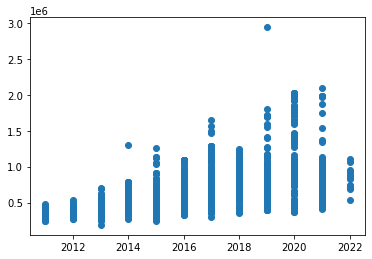

In [34]:
x = df['Make_Year']
y=df['Price']
plt.scatter(x,y)

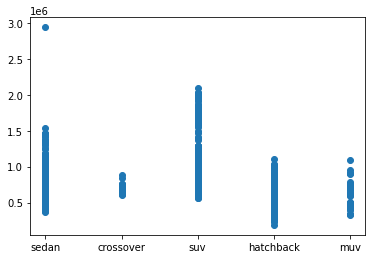

In [35]:
x = df['Body_Type']
y=df['Price']
plt.scatter(x,y)

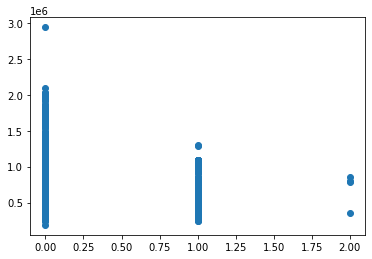

In [36]:
x = df['No_of_Owners']
y=df['Price']
plt.scatter(x,y)

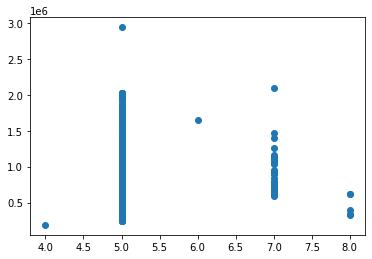

In [37]:
x = df['Seating_Capacity']
y=df['Price']
plt.scatter(x,y)

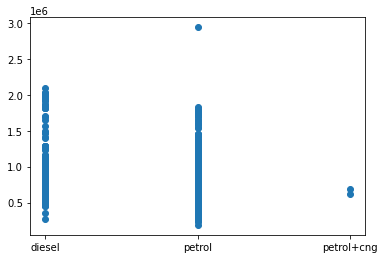

In [38]:
x = df['Fuel_Type']
y=df['Price']
plt.scatter(x,y)

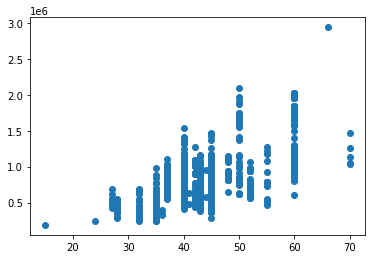

In [39]:
x = df['Fuel_Tank_Capacity(L)']
y=df['Price']
plt.scatter(x,y)

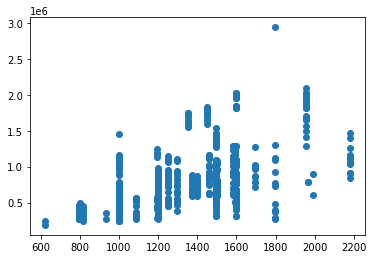

In [40]:
x = df['CC_Displacement']
y=df['Price']
plt.scatter(x,y)

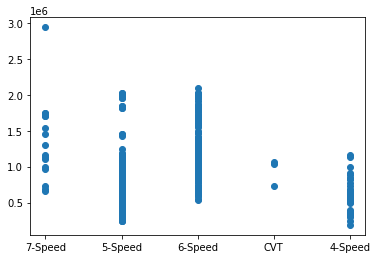

In [41]:
x = df['Transmission']
y=df['Price']
plt.scatter(x,y)

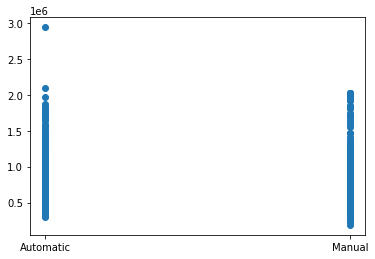

In [42]:
x = df['Transmission_Type']
y=df['Price']
plt.scatter(x,y)

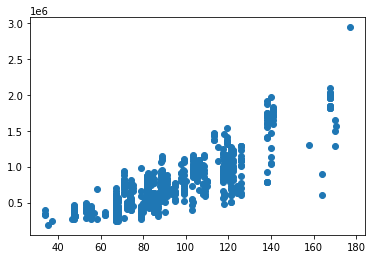

In [43]:
x = df['Power(BHP)']
y=df['Price']
plt.scatter(x,y)

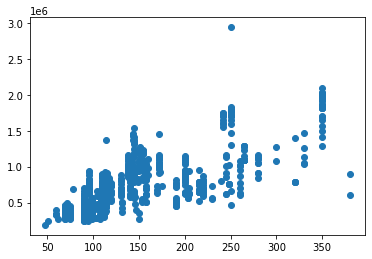

In [44]:
x = df['Torque(Nm)']
y=df['Price']
plt.scatter(x,y)

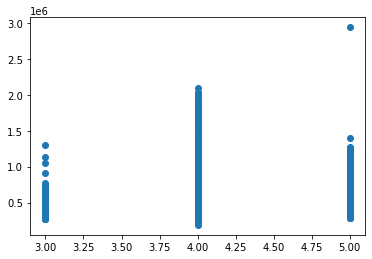

In [45]:
x = df['Emission']
y=df['Price']
plt.scatter(x,y)

As you can see, many of the features have a linear relationship with the model. But a few don't. While it would be more simple to drop the features that aren't linear to make a linear regression model, I want my model to be very accurate and incorporate those features. So I am going to mess around and see which kind of modeling scores best.

# Modeling

Now we will split the data using an import from sklearn call 'train, test, split'. This will split the data in way so that we can use the majority of it to select, and train our model. Then, when we have developed our final model, we will use the testing data to see how accurately it can predict the target value which in this case is the price. The first step is to isolate the target variable from the data frame.

In [46]:
X = df.drop('Price',axis=1)
y = df['Price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

In [48]:
X_train

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission
967,2017,sedan,33258,0,5,petrol,37,1197,5-Speed,Automatic,88.50,113.00,23.26,5
365,2016,suv,97039,0,5,diesel,60,1582,6-Speed,Manual,126.00,265.00,17.01,4
559,2020,suv,13185,0,5,diesel,60,1596,5-Speed,Manual,167.68,350.00,17.41,4
33,2021,hatchback,13389,0,5,petrol,37,998,7-Speed,Automatic,118.00,172.00,20.20,4
31,2013,sedan,10651,0,5,petrol,35,1198,5-Speed,Manual,86.90,109.00,18.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2014,sedan,68269,1,5,petrol,55,1598,5-Speed,Manual,103.20,153.00,16.09,3
270,2021,hatchback,27185,0,5,petrol,37,1197,5-Speed,Manual,81.86,113.75,20.07,4
860,2019,suv,73732,0,5,diesel,40,1498,6-Speed,Manual,97.89,200.00,23.70,4
435,2011,hatchback,49985,0,5,petrol,35,1197,5-Speed,Manual,68.00,99.08,19.81,3


### Dummy Model

Now let's apply a dummy regressor to see our baseline. In other words, a sort of 'floor' to compare to see how much were solving for with our modeling. I imported the dummy regressor as DR for an abbreviate.

In [49]:
dr1 = dr()

In [50]:
dr1.fit(X_train,y_train)

DummyRegressor()

In [51]:
dr1.score(X_train,y_train)

0.0

We can see that our dummy model esentially doesn't solve anything because we havent built the right model for the data. It got an R squared score of 0, which means that none of the variance in the target data is a result of the features in this models computation. This is because the dummy model simply predicts the mean as every value.

### Piping

Now I am going to do something called Piping. this is where in wrapp up certain proceadures like StandardScaler and OneHotEncoder. StandardScaler will scale all of my numeric values so that they can be properly compared to eachother to asses their impact on the target value. OneHotEncoder will turn all of my categorical values into binary columns. This will allow them to be scaled with the other values for the computation. It is like scaling for objects.

In [52]:
pipe = Pipeline(steps=[('ss', StandardScaler())])

In [53]:
pipe_2 = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

Here when I set up my pipe to work on columns, I assigned the 'pipe' that I want and after that I assigned the columns I want the pipe to transform with an array as the last argument. The array tells the transformer which columnsto transform.

In [54]:
CT = ColumnTransformer(transformers=[('pipe', pipe,[0,2,3,4,6,7,10,11,12,13]),
                                         ('pipe_2',pipe_2,[1,5,8,9])],
                           remainder='drop')

Now I am going to create one last pipe, which will incorporate my Transformer, and my model into one pipe. Let's start off a linear regression to see how that scores.

In [55]:
lr_ct_pipe = Pipeline(steps=[('ct', CT),
                            ('dtr', LinearRegression())])

In [56]:
lr_ct_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pipe',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4, 6, 7, 10, 11, 12,
                                                   13]),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 5, 8, 9])])),
                ('dtr', LinearRegression())])

In [57]:
lr_ct_pipe.score(X_train,y_train)

0.8810267274425316

The R_Squared score is an 82. Not bad, lets try this with a Decision Tree Regressor and see how that one performs.

In [58]:
dtr_ct_pipe = Pipeline(steps=[('ct', CT),
                            ('dtr', DecisionTreeRegressor(random_state=42))])

In [59]:
dtr_ct_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pipe',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4, 6, 7, 10, 11, 12,
                                                   13]),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 5, 8, 9])])),
                ('dtr', DecisionTreeRegressor(random_state=42))])

In [60]:
dtr_ct_pipe.score(X_train, y_train)

1.0

Now we got an R_Squared score of 100. Clearly much better. Yet, we might be over fit. This is something we will address in our next steps.

### Grid

While our model may be over fit, it certainly is a much better score. Let's run it through a grid to find our best parameters for the decision tree regressor.

A grid runs the model with all of the parameter options that I create. It will then tell me which combination of parameter options score the best.

I am going to use the criterion you see below, because there are only four I know of that are commonly used. So why not test them all. The splitter option which decides at which nodes the decision tree should split, is most commonly either best or random so I thought I would make both an option and see which one is better. From my intuition I believe that 5 will be the best amount of minimum samples to split. Thats essentialy how deap the tree goes. But I could be either to high or too low with that estimation. So (no punn intended) I am going to go two up and two down as my other opens and see which one performs the best. 

In [61]:
grid = {'dtr__criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'dtr__splitter' : ['best', 'random'], 'dtr__min_samples_split' : [3,5,7]  }

In [62]:
gs= GridSearchCV(dtr_ct_pipe, grid, verbose=3, n_jobs=-2)

In [63]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:    2.1s finished


GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('pipe',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          3, 4,
                                                                          6, 7,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13]),
                                                                        ('pipe_2',
                             

In [64]:
gs.score(X_train, y_train)

0.9921067021107942

We got a R_squared score of 99. This is really a remarkable score. The tuning probably cleared out someone of the types of interpretations that made it over fit. Let's look at the best parameters for the Decision Tree Regressor.

In [65]:
gs.best_params_

{'dtr__criterion': 'friedman_mse',
 'dtr__min_samples_split': 7,
 'dtr__splitter': 'best'}

Intresting. This means that with the specific set of data that we are using, the model runs best on it with these parameters.

Below you will see the model that uses these parameters.

In [66]:
gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pipe',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4, 6, 7, 10, 11, 12,
                                                   13]),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 5, 8, 9])])),
                ('dtr',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       min_samples_split=7, random_state=42))])

In [67]:
best_model = gs.best_estimator_

Now let's take a look at the predictions our model makes based on the data from the test set. 'X_test'.

In [68]:
best_model.predict(X_test)

array([ 330000.        ,  467500.        ,  629500.        ,
        666000.        , 1900000.        , 1070000.        ,
        426500.        ,  699000.        ,  540000.        ,
       1576000.        ,  703600.        ,  629500.        ,
       1359500.        ,  804400.        ,  636000.        ,
        792333.33333333,  680200.        ,  839500.        ,
        315000.        ,  312166.66666667, 1085000.        ,
        491200.        ,  971000.        ,  502200.        ,
        742400.        ,  562000.        , 1104000.        ,
        307250.        ,  697000.        ,  431000.        ,
        582200.        ,  287500.        ,  437000.        ,
        836500.        ,  750333.33333333,  836500.        ,
        801000.        ,  429600.        ,  744000.        ,
        426500.        ,  666000.        ,  439000.        ,
        339800.        , 1055833.33333333, 1047000.        ,
        914000.        ,  530200.        ,  578500.        ,
       1438000.        ,

### Evaluation

So let's assign this to a variable called y_pred because its the models prediction of y which is supposed to be the target value.

In [69]:
y_pred = best_model.predict(X_test)

Now lets get the mean squared error but let not square it so that its really just the mean error.

In [70]:
mse = sklearn.metrics.mean_squared_error

In [71]:
mse(y_test,y_pred, squared=False)

94217.82466354487

Now that we have the mean squared error (94217), lets return the R^2 score!

In [72]:
best_model.score(X_test,y_test)

0.9252660358478912

This tells us that 92% of the varience in price is explained by the features in this model. This is a testament to the accuracy of the model.

In [73]:
Comparison_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'Percentage Difference':abs(y_test-y_pred)/y_test * 100})
Comparison_df.tail()

,Real Values,Predicted Values,Percentage Difference
578,485000,514000.00,5.98
327,498000,554000.00,11.24
878,617000,676666.67,9.67
849,430000,459250.00,6.80
801,454000,378666.67,16.59


Average of 8.4% difference amongst the real and predicted values

In [74]:
sub_comps = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, ' Difference':y_pred-y_test})
sub_comps.tail()

,Real Values,Predicted Values,Difference
578,485000,514000.00,29000.00
327,498000,554000.00,56000.00
878,617000,676666.67,59666.67
849,430000,459250.00,29250.00
801,454000,378666.67,-75333.33


You can see here that the highly accurate model predicted that the first four cars in this table would sell for significantly more than their current prices. We know its accurate because of its R_squared score. This is an example of how our Echo Park Automotive would monitize on our model. Essentially they would buy the cars for there current price in 'real values' and then flip them for the values that the model predicted. The last car on the table is predicted to sell for less than the real value. This is an example of a car the model is telling you that you should not buy.

In [75]:
sum(Comparison_df['Percentage Difference'].values)/len(Comparison_df['Percentage Difference'].values)

8.418413410289268

creating a scatter plot where the x axis is the predicted price and the y axis is the actual price data of the testing set.
I also added a best line of fit to show the accuracy

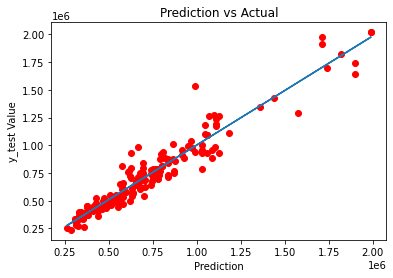

In [76]:
x=best_model.predict(X_test) 
y=y_test
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color = 'red')
plt.plot(x, a*x+b)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('y_test Value')
plt.show()

## Recommendation 

We recommend that Echo Park Automotive used our model to predict the price of used cars. We recommend that they buy used cars which are selling for less than their predicted price. After buying the cars, they can then flip them for the predicted price. They will make money because they have sold cars for more than they have bought them. We also recommend that Echo Park Automotive does not buy cars which are selling for more than their predicted price.

# Conclusion

We essentially used a series of web scraped data to make a model that is capable of monetizing accuracy on a market analysis. Not every car sells for the exact price it should based on its featues. This is due to many variables which are yet to be identified. What we have done is created a way for Echo Park Automotive to accuratley predict the selling price of a used car and to capitalize on the wide range of the selling market. We have created a model that has an R_squared score of 92. That is highly accurate and gives Echo Park Automotive the confidence they need to invest based off of our model. We can see that there were many steps taken into buildign the model including data analysis, data prep, figuring out which kind of model best suits our data, piping some of our data prep into our model tuning and engaging in a grid search to create our most accurate model. What has resulted of this is guide for the business model of Echo Park Automotive.  

### Next steps

First let's acknowledge that the model is a little bit over fit to the data. This is something we would work on down the road. The main goal moving forward is to apply this concept to many other kinds of assets. There is so much more data out there that we can tap into. The last thing is that we would set a stream of data that is constantly webscraping to update our model. Market's change and shift. In todays world, you need to be constantly ready to evolve or you will get overpowered by a competitor.